# Importing library 

In [1]:
import cv2
import numpy as nump
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # load the database mnist 

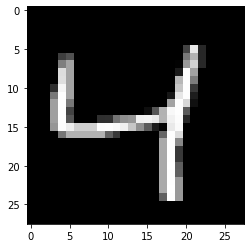

4


In [3]:
## Looking at a sample
plt.imshow(X_train[2], cmap="gray")
plt.show()
print (y_train[2])

## Data Preprocessing

In [4]:
## Checking out the shapes involved in dataset
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (60000, 28, 28)
y_train :  (60000,)
X_test :  (10000, 28, 28)
y_test :  (10000,)


In [5]:
#Reshape
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [6]:
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (60000, 28, 28, 1)
y_train :  (60000,)
X_test :  (10000, 28, 28, 1)
y_test :  (10000,)


**to_categorical Converts a class vector (integers) to binary class matrix.**

In [7]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

## Build the model 

In [8]:
### Declare the model 
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

### fonctionne mais moins bien que le premier
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## Compiling the model

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training the model

In [14]:
model.fit(X_train,y_train,batch_size=32,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 39s 645us/step - loss: 0.1732 - accuracy: 0.9497
Epoch 2/3
60000/60000 [==============================] - 41s 682us/step - loss: 0.1562 - accuracy: 0.9551
Epoch 3/3
60000/60000 [==============================] - 39s 649us/step - loss: 0.1394 - accuracy: 0.9590


## Predicting and testing

In [11]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
10000/10000 [==============================] - 1s 136us/step
test loss, test acc: [0.06723761013150215, 0.9797000288963318]


In [12]:
prediction = model.predict(X_test)

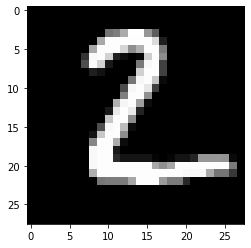

X_test[0] prediction :  2


In [13]:
plt.imshow(X_test[1].reshape(X_test[1].shape[1],X_test[1].shape[0]), cmap="gray")
plt.show()
print("X_test[0] prediction : ",nump.argmax(prediction[1]))